In [1]:
# Import Modules
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.dates as mdates

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Automated Weather Stations Datasets
# AWS11 "Halvfarryggen" - on an ice rise on Ekström Ice Shelf in coastal Dronning Maud Land, East Antarctica.
# AWS18 "Larsen C West" - on innermost Larsen C Ice Shelf on the Antarctic Peninsula
aws11_fn = 'IMAU_aws11_high-res_meteo_daily.csv'
aws18_fn = 'IMAU_aws18_high-res_meteo_daily.csv'

aws11data = pd.read_csv(aws11_fn, parse_dates=['Date/Time'], index_col=['Date/Time'])
aws18data = pd.read_csv(aws18_fn, parse_dates=['Date/Time'], index_col=['Date/Time'])

In [3]:
# View first few rows of the first dataset
aws11data.head()

,TTT [°C] (at 2m height),THETA [K] (at 2m height),Surf temp [°C] (modelled),Surf temp [°C] (calculated from LWU),Humidity spec [g/kg] (at 2m height),Humidity spec [g/kg] (at surface),RH [%] (at 2m height),ff [m/s] (at 10m height),PPPP [hPa] (at surface),Cloud cov [%],...,LWU [W/m**2] (modelled),LWU [W/m**2] (observed),NET [W/m**2],Qh [W/m**2],Qe [W/m**2],Ground heat flux [W/m**2],"Melt rate [mm w.e.] (surface melt, within dt)","Melt rate [mm w.e.] (cumulative surface melt, with...)",Runoff [mm] (within dt),Sublimation [mm w.e.] (within dt)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2007-01-18,-5.077121,275.203000,-6.151386,-7.739457,2.456909,2.561588,90.229676,5.587614,912.192857,0.085822,...,288.391489,281.562821,36.289104,7.012074,-6.252992,-31.437709,0.0,0.0,0.0,-0.011760
2007-01-19,-5.256800,275.188304,-7.396471,-10.760362,2.404210,2.298867,89.480925,6.684296,910.225000,0.407410,...,283.029387,268.950229,1.739866,13.242204,-3.451192,-11.352040,0.0,0.0,0.0,-0.003895
2007-01-20,-5.355375,274.587321,-6.059179,-7.891842,2.341563,2.491672,88.453258,13.786988,916.037500,0.920180,...,288.550451,280.722375,3.242020,15.885216,-11.375326,-7.750259,0.0,0.0,0.0,-0.014382
2007-01-21,-5.559692,274.463850,-7.093500,-7.825096,2.283151,2.304989,87.680468,4.091806,915.033333,0.555310,...,284.186468,281.130163,-7.763294,11.565392,-0.828808,-3.052535,0.0,0.0,0.0,-0.001390
2007-01-22,-5.655987,275.031292,-6.044867,-9.061367,2.265362,2.575626,86.974301,2.725828,907.295833,0.308729,...,288.770791,275.980846,11.882529,0.759757,-6.344762,-6.284145,0.0,0.0,0.0,-0.007999


In [4]:
# View info about the data fields of the first dataset
# Dates: 2007-01-18 to 2019-01-30
aws11data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4396 entries, 2007-01-18 to 2019-01-30
Data columns (total 28 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   TTT [°C] (at 2m height)                                 4396 non-null   float64
 1   THETA [K] (at 2m height)                                4396 non-null   float64
 2   Surf temp [°C] (modelled)                               4396 non-null   float64
 3   Surf temp [°C] (calculated from LWU)                    3644 non-null   float64
 4   Humidity spec [g/kg] (at 2m height)                     4396 non-null   float64
 5   Humidity spec [g/kg] (at surface)                       4396 non-null   float64
 6   RH [%] (at 2m height)                                   4396 non-null   float64
 7   ff [m/s] (at 10m height)                                4396 non-null   float64
 8   PPPP [hPa] (at surfa

In [5]:
# View the first few rows of the second dataset
#aws18data.head()

In [6]:
# View info about the data fields of the second dataset
# Dates: 2014-11-25 to 2018-12-31
#aws18data.info()

# Winds and 2-m Air Temperature

In [7]:
# Subset full time series to 2017 and plot
aws11data_subset = aws11data.loc['2017-01-01':'2017-12-31']

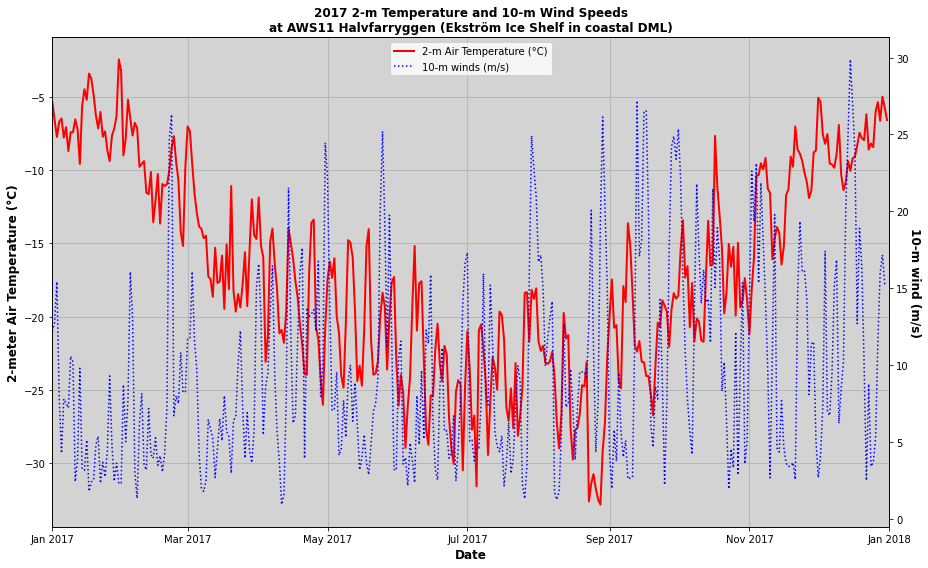

In [63]:
# Plot AWS11 2-m Temperature and 10-m winds
fontsize = 12

# Create figure and primary axis
fig, ax = plt.subplots(figsize=(15,10))

# Plot 2-m Temperature data
TempPlot = ax.plot(aws11data_subset.index.values, aws11data_subset['TTT [°C] (at 2m height)'],
        color='red', label='2-m Air Temperature (°C)', linewidth=2)

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('2-meter Air Temperature (°C)', size=fontsize, weight='bold')


# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])


# Create a secondary x-axis for 10-m winds
ax2 = ax.twinx()

# Plot wind speed data
WindPlot = ax2.plot(aws11data_subset.index.values, aws11data_subset['ff [m/s] (at 10m height)'],
                    color='blue', linestyle=':', label='10-m winds (m/s)')

# Plot legend (all in one box)
plots = TempPlot+WindPlot
labels = [l.get_label() for l in plots]
ax.legend(plots, labels, loc='upper center')

ax2.set_ylabel('10-m wind (m/s)', rotation=270, labelpad=12, size=fontsize, weight='bold')

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

ax.grid()
plt.title('2017 2-m Temperature and 10-m Wind Speeds\n'+
           'at AWS11 Halvfarryggen (Ekström Ice Shelf in coastal DML)', size=fontsize,
          weight='bold')
plt.savefig("figures/AWS11_2mTmp_10mWnd.png", facecolor='white', dpi=300)
plt.show()

In [9]:
# Create variables for AWS11 Surface Temp and 2-m Temp
aws11SfcTemp = aws11data_subset['Surf temp [°C] (modelled)']
aws11Temp2m = aws11data_subset['TTT [°C] (at 2m height)']

# Take the difference between them
TempDiff = aws11SfcTemp - aws11Temp2m

date = np.array(aws11data_subset.index.values)

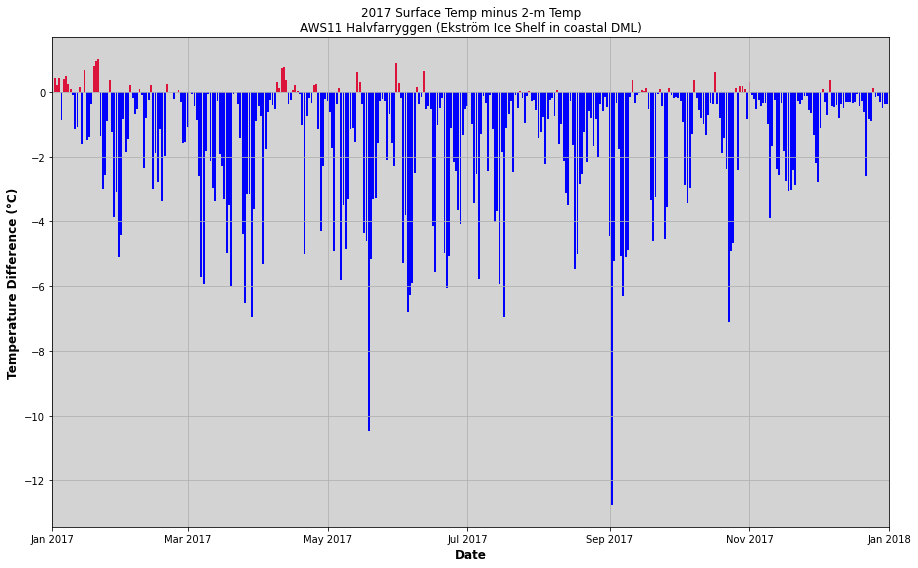

In [62]:
# Plot AWS11 Temperature Difference (Sfc Temp minus 2-m Temp)
fontsize=12

# Create new figure and primary axis
fig, ax = plt.subplots(figsize=(15,10))

diff = np.array (diff)

# Create variables for positive and negative values
posValues = TempDiff >= 0
negValues = TempDiff < 0

# Plot the temperature difference between the two temp variables
ax.bar(date[posValues], TempDiff[posValues], color='crimson') # crimson = Sfc Temp warmer than 2-m Temp
ax.bar(date[negValues], TempDiff[negValues], color='blue') # blue = Sfc Temp colder than 2-m Temp

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Temperature Difference (°C)', size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

ax.grid()
plt.title('2017 Surface Temp minus 2-m Temp\n'+
          'AWS11 Halvfarryggen (Ekström Ice Shelf in coastal DML)')
plt.savefig('figures/AWS11_SfcTmp_minus_2mTmp.png', facecolor='white', dpi=300)
plt.show()

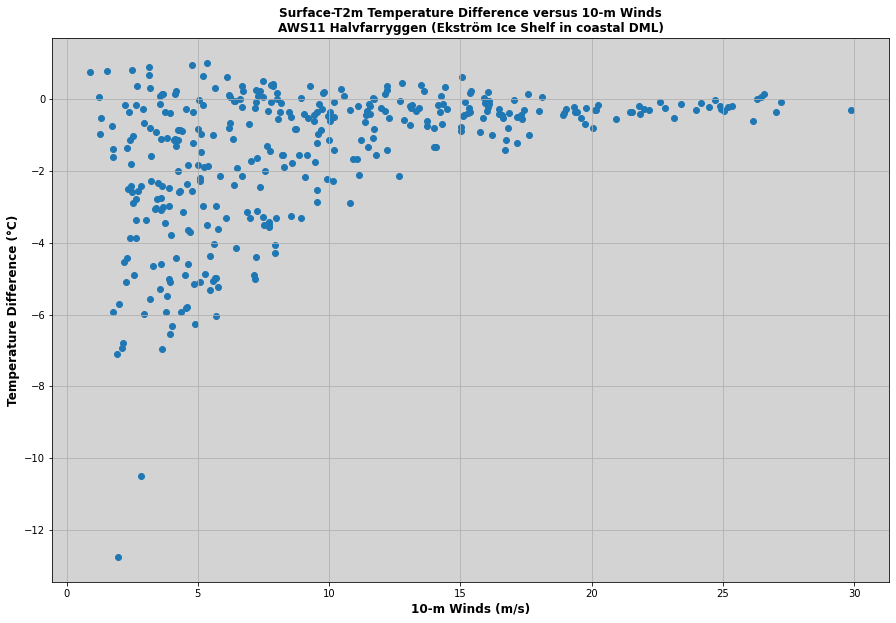

In [64]:
fontsize = 12

fig, ax = plt.subplots(figsize=(15,10))

wnd = aws11data_subset['ff [m/s] (at 10m height)']

# Create a scatter plot of the Sfc-2m temperature difference
ax.scatter(wnd, diff)

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('10-m Winds (m/s)', size=fontsize, weight='bold')
ax.set_ylabel('Temperature Difference (°C)', size=fontsize, weight='bold')


plt.title('Surface-T2m Temperature Difference versus 10-m Winds\n'+
          'AWS11 Halvfarryggen (Ekström Ice Shelf in coastal DML)',
          size=fontsize, weight='bold')

ax.grid()
plt.savefig('figures/AWS11_Sfc-T2m_versus_10mWnd.png', facecolor='white', dpi=300)
plt.show()

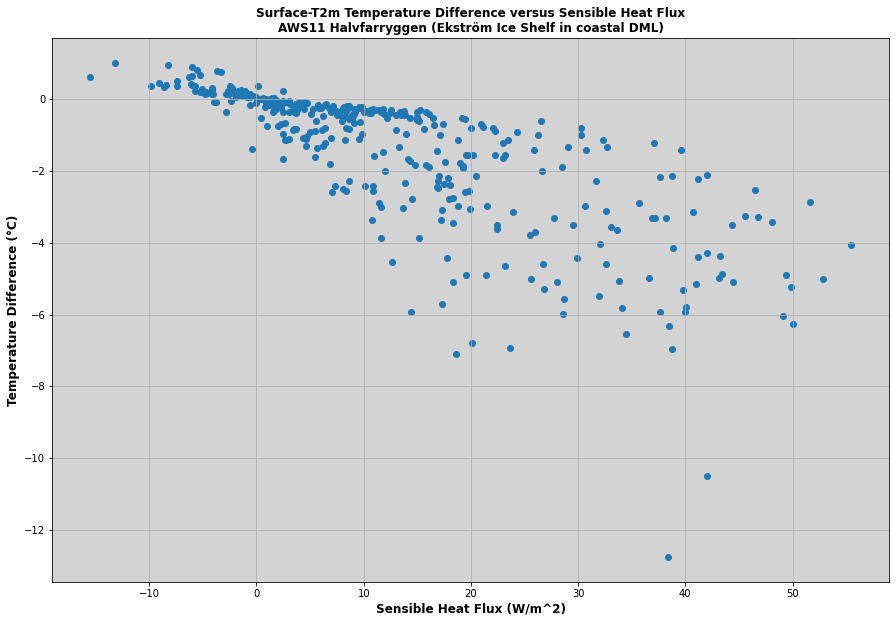

In [65]:
fontsize = 12

fig, ax = plt.subplots(figsize=(15,10))

SHF = aws11data_subset['Qh [W/m**2]']

# Create a scatter plot of the Sfc-2m temperature difference
ax.scatter(SHF, TempDiff)

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Sensible Heat Flux (W/m^2)', size=fontsize, weight='bold')
ax.set_ylabel('Temperature Difference (°C)', size=fontsize, weight='bold')


plt.title('Surface-T2m Temperature Difference versus Sensible Heat Flux\n'+
          'AWS11 Halvfarryggen (Ekström Ice Shelf in coastal DML)',
          size=fontsize, weight='bold')

ax.grid()
plt.savefig('figures/AWS11_Sfc-T2m_versus_SensibleHeatFlux.png', facecolor='white', dpi=300)
plt.show()

# Albedo

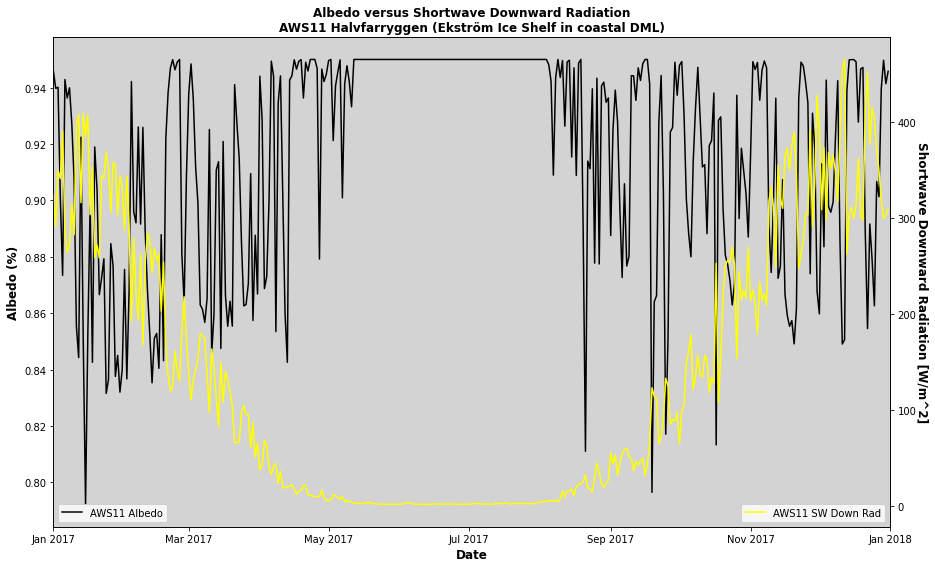

In [67]:
# Plot AWS11 Albedo vs Incoming Solar Radiation
fontsize = 12

# Create a variable for AWS11 Albedo
aws11Albedo = aws11data_subset['Albedo [%] (24-hour running mean observed...)']
aws11SWD = aws11data_subset['SWD [W/m**2]']

# Create figure and primary axis
fig, ax = plt.subplots(figsize=(15,10))

# Create a plot of AWS11 Albedo
ax.plot(date, aws11Albedo, color='black', label='AWS11 Albedo')

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Albedo (%)', size=fontsize, weight='bold')

# Get rid of margins
ax.set_xlim('2017-01','2018-01')

# Create a secondary x-axis for Incoming Solar Radiation
ax2 = ax.twinx()

# Create a plot of AWS11 SW Downward Radiation
ax2.plot(date, aws11SWD , color='yellow', label='AWS11 SW Down Rad')
ax2.set_ylabel('Shortwave Downward Radiation [W/m^2]', rotation=270, 
               labelpad=12, size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

plt.title('Albedo versus Shortwave Downward Radiation\n'+
          'AWS11 Halvfarryggen (Ekström Ice Shelf in coastal DML)',
          size=fontsize, weight='bold')

ax.legend(loc='lower left')
ax2.legend(loc='lower right')
plt.savefig('figures/AWS11_Albedo_SWD.png', facecolor='white', dpi=300)
plt.show()

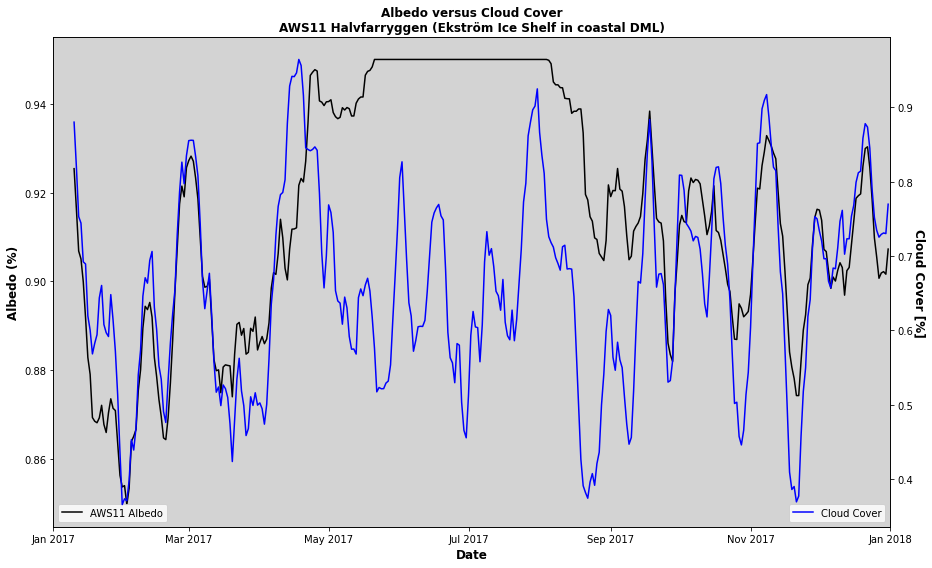

In [11]:
# Exam 1 - Question 14
# Plot AWS11 Albedo vs Cloud Cover
fontsize = 12

# Create a variable for AWS11 Albedo
aws11Albedo = aws11data_subset['Albedo [%] (24-hour running mean observed...)'].rolling(10).mean()
aws11CldCov = aws11data_subset['Cloud cov [%]'].rolling(10).mean()


# Create figure and primary axis
fig, ax = plt.subplots(figsize=(15,10))

# Create a plot of AWS11 Albedo
ax.plot(date, aws11Albedo, color='black', label='AWS11 Albedo')

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Albedo (%)', size=fontsize, weight='bold')

# Get rid of margins
ax.set_xlim('2017-01','2018-01')

# Create a secondary x-axis for Incoming Solar Radiation
ax2 = ax.twinx()

# Create a plot of AWS11 SW Downward Radiation
ax2.plot(date, aws11CldCov , color='blue', label='Cloud Cover')
ax2.set_ylabel('Cloud Cover [%]', rotation=270, 
               labelpad=12, size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

plt.title('Albedo versus Cloud Cover\n'+
          'AWS11 Halvfarryggen (Ekström Ice Shelf in coastal DML)',
          size=fontsize, weight='bold')

ax.legend(loc='lower left')
ax2.legend(loc='lower right')
plt.savefig('figures/exam1_AWS11_Albedo_CldCov.png', facecolor='white', dpi=300)
plt.show()

In [93]:
# Create a subset of the AWS18 data for the year 2017
aws18data_subset = aws18data.loc['2017-01-01':'2017-12-31']

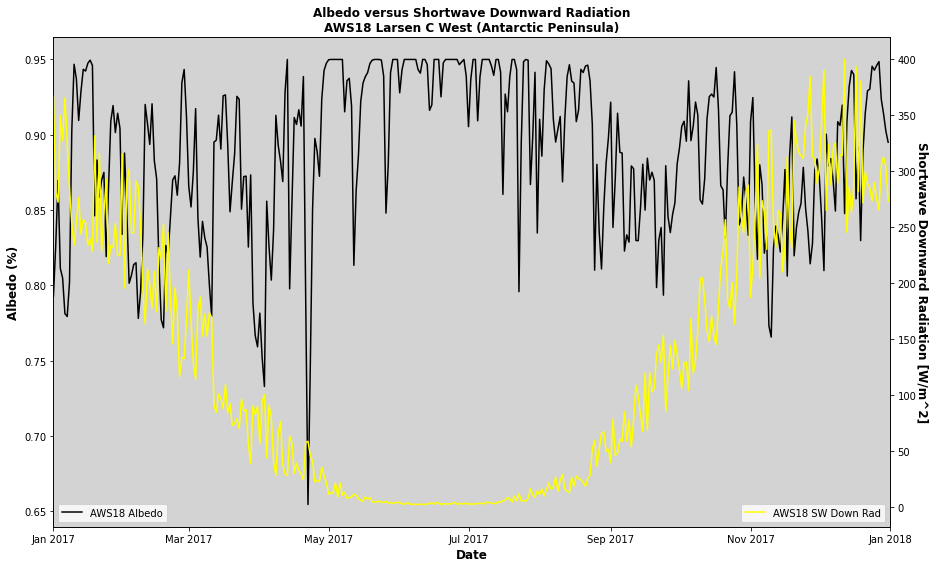

In [68]:
# Plot AWS18 Albedo vs Incoming Solar Radiation
fontsize = 12

# Create a variable for Albedo
aws18Albedo = aws18data_subset['Albedo [%] (24-hour running mean observed...)']

# Create figure and primary axis
fig, ax = plt.subplots(figsize=(15,10))

# Create a plot of AWS18 Albedo
ax.plot(date, aws18Albedo, color='black', label='AWS18 Albedo')

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Albedo (%)', size=fontsize, weight='bold')


# Create a secondary x-axis for Incoming Solar Radiation
ax2 = ax.twinx()

# Create a plot of AWS18 SW Downward Radiation
ax2.plot(date, aws18data_subset['SWD [W/m**2]'], color='yellow', label='AWS18 SW Down Rad')
ax2.set_ylabel('Shortwave Downward Radiation [W/m^2]', rotation=270, 
               labelpad=12, size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

plt.title('Albedo versus Shortwave Downward Radiation\n'+
          'AWS18 Larsen C West (Antarctic Peninsula)',
          size=fontsize, weight='bold')

ax.legend(loc='lower left')
ax2.legend(loc='lower right')
plt.savefig('figures/AWS18_Albedo_SWD.png', facecolor='white', dpi=300)
plt.show()

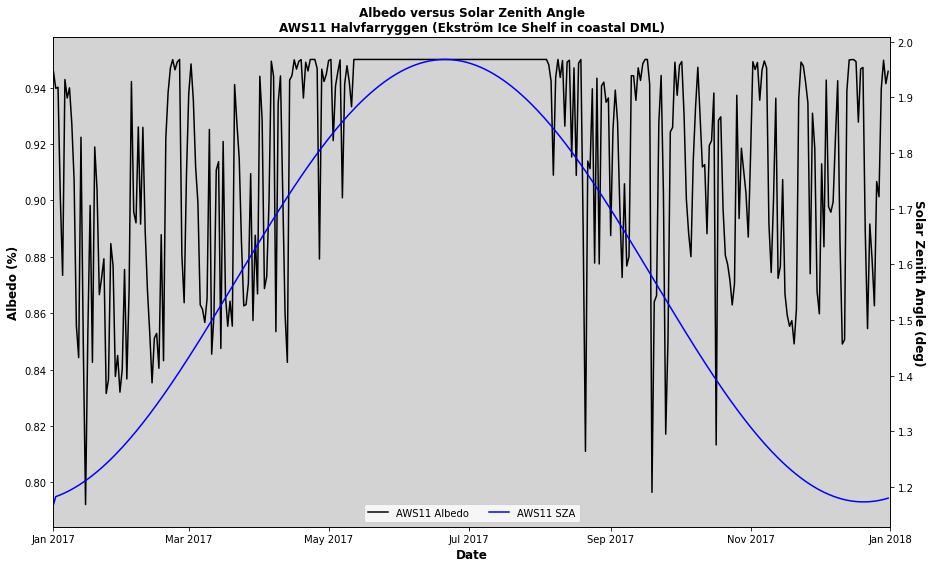

In [70]:
# Plot AWS11 Albedo vs Solar Zenith Angle
fontsize = 12

# Create variable for AWS11 Solar Zenith Angle
aws11SZA = aws11data_subset['SZA [deg]']

# Create figure and primary axis
fig, ax = plt.subplots(figsize=(15,10))

# Create a plot of AWS11 Albedo
AWS11Albedo_plot = ax.plot(date, aws11Albedo, color='black', label='AWS11 Albedo')

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Albedo (%)', size=fontsize, weight='bold')


# Create a secondary x-axis for Solar Zenith Angle
ax2 = ax.twinx()

# Create a plot of AWS11 Solar Zenith Angle
AWS11SZA_plot = ax2.plot(date, aws11SZA , color='blue', label='AWS11 SZA')
ax2.set_ylabel('Solar Zenith Angle (deg)', rotation=270, 
               labelpad=12, size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

plt.title('Albedo versus Solar Zenith Angle\n'+
          'AWS11 Halvfarryggen (Ekström Ice Shelf in coastal DML)',
          size=fontsize, weight='bold')

plots = AWS11Albedo_plot+AWS11SZA_plot
labels = [l.get_label() for l in plots]
ax.legend(plots, labels, loc='lower center', ncol=2)

plt.savefig('figures/AWS11_Albedo_SZA.png', facecolor='white', dpi=300)
plt.show()

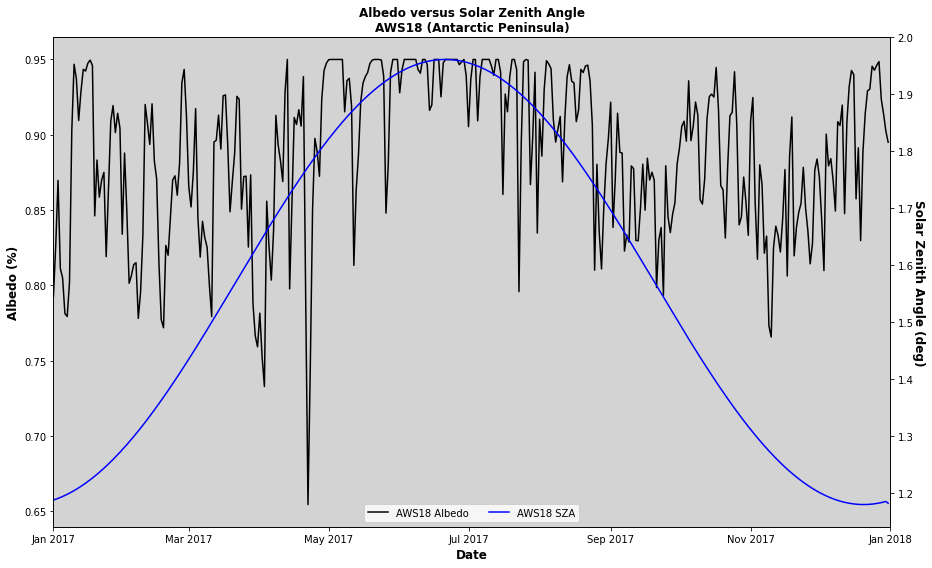

In [99]:
# Plot AWS18 Albedo vs Solar Zenith Angle
fontsize = 12

# Create variable for AWS18 Solar Zenith Angle
aws18SZA = aws18data_subset['SZA [deg]']

# Create figure and primary axis
fig, ax = plt.subplots(figsize=(15,10))

# Create a plot of AWS18 Albedo
AWS18Albedo_plot = ax.plot(date, aws18Albedo, color='black', label='AWS18 Albedo')

# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Albedo (%)', size=fontsize, weight='bold')


# Create a secondary x-axis for Solar Zenith Angle
ax2 = ax.twinx()

# Create a plot of AWS11 Solar Zenith Angle
AWS18SZA_plot = ax2.plot(date, aws18SZA , color='blue', label='AWS18 SZA')
ax2.set_ylabel('Solar Zenith Angle (deg)', rotation=270, 
               labelpad=12, size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

plt.title('Albedo versus Solar Zenith Angle\n'+
          'AWS18 (Antarctic Peninsula)',
          size=fontsize, weight='bold')

plots = AWS18Albedo_plot+AWS18SZA_plot
labels = [l.get_label() for l in plots]
ax.legend(plots, labels, loc='lower center', ncol=2)

plt.savefig('figures/AWS18_Albedo_SZA.png', facecolor='white', dpi=300)
plt.show()

# Surface Energy Balance

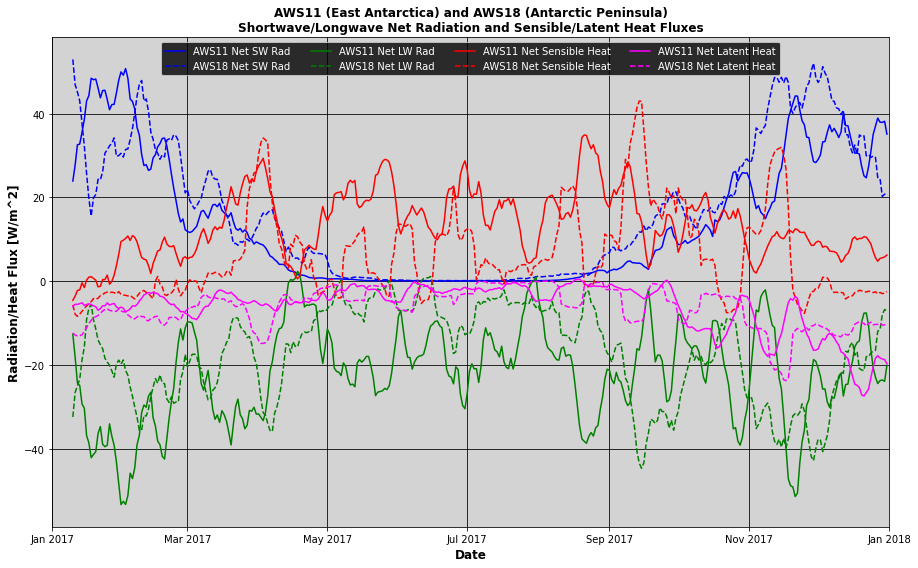

In [71]:
# AWS11/AWS18 Shortwave Net Radiation, Longwave Net Radiation,
# Sensible Heat Flux, and Latent Heat Flux

fontsize = 12

# AWS11 variables
aws11NetSW = aws11data_subset['Net SW [W/m**2]'].rolling(10).mean() # Net Shortwave Rad
aws11NetLW = aws11data_subset['Net LW [W/m**2]'].rolling(10).mean() # Net Longwave Rad
aws11NetQh = aws11data_subset['Qh [W/m**2]'].rolling(10).mean() # Sensible Heat Flux
aws11NetQe = aws11data_subset['Qe [W/m**2]'].rolling(10).mean() # Latent Heat Flux

# AWS18 variables
aws18NetSW = aws18data_subset['Net SW [W/m**2]'].rolling(10).mean()
aws18NetLW = aws18data_subset['Net LW [W/m**2]'].rolling(10).mean()
aws18NetQh = aws18data_subset['Qh [W/m**2]'].rolling(10).mean()
aws18NetQe = aws18data_subset['Qe [W/m**2]'].rolling(10).mean()

# Set up figure and axis
fig, ax = plt.subplots(figsize=(15,10))

# Create a plot of the above variables,
# using dashed lines to differentiate stations
ax.plot(date, aws11NetSW, color='blue', label='AWS11 Net SW Rad')
ax.plot(date, aws18NetSW, color='blue', linestyle='--', label='AWS18 Net SW Rad')

ax.plot(date, aws11NetLW, color='green', label='AWS11 Net LW Rad')
ax.plot(date, aws18NetLW, color='green', linestyle='--', label='AWS18 Net LW Rad')

ax.plot(date, aws11NetQh, color='red', label='AWS11 Net Sensible Heat' )
ax.plot(date, aws18NetQh, color='red', linestyle='--', label='AWS18 Net Sensible Heat')

ax.plot(date, aws11NetQe, color='magenta', label='AWS11 Net Latent Heat')
ax.plot(date, aws18NetQe, color='magenta', linestyle='--', label='AWS18 Net Latent Heat')


# Set title and labels for axes
ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Radiation/Heat Flux [W/m^2]', size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')


plt.title('AWS11 (East Antarctica) and AWS18 (Antarctic Peninsula)\n'+
          'Shortwave/Longwave Net Radiation and Sensible/Latent Heat Fluxes',
          size=fontsize, weight='bold')

leg = plt.legend(facecolor='black', ncol=4, loc='upper center')
for text in leg.get_texts():
    plt.setp(text, color='w')
    
ax.grid(color='black')

plt.savefig('figures/AWS1118_NetRad_HeatFlux.png', facecolor='white', dpi=300)
plt.show()

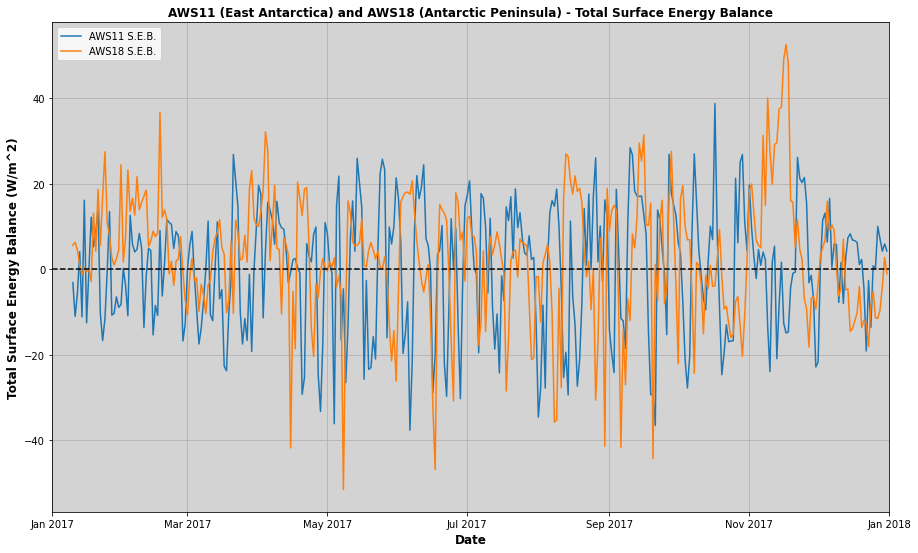

In [73]:
# Plot Total Surface Energy Balance for both stations

fontsize=12

# AWS11/AWS18 Net Radiation
aws11NetRad = aws11data_subset['NET [W/m**2]']
aws18NetRad = aws18data_subset['NET [W/m**2]']

# AWS11/AWS18 Ground Heat Flux
aws11GrdHtFlux = aws11data_subset['Ground heat flux [W/m**2]']
aws18GrdHtFlux = aws18data_subset['Ground heat flux [W/m**2]']

# Calculate the surface energy balance for both stations
# SEB = Net Radiation + Sensible Heat Flux + Net Latent Heat Flux + Ground Heat Flux
aws11SEB = aws11NetRad + aws11NetQh + aws11NetQe + aws11GrdHtFlux
aws18SEB = aws18NetRad + aws18NetQh + aws11NetQe + aws18GrdHtFlux

# Set up figure and axis
fig, ax = plt.subplots(figsize=(15,10))

# Plot AWS11/AWS18 S.E.B. along w/ a horizontal line at S.E.B. = 0
ax.plot(date, aws11SEB, label='AWS11 S.E.B.')
ax.plot(date, aws18SEB, label='AWS18 S.E.B.')
plt.axhline(y=0, color='black', linestyle='--')

ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Total Surface Energy Balance (W/m^2)', size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')


plt.title('AWS11 (East Antarctica) and AWS18 (Antarctic Peninsula)'+
          ' - Total Surface Energy Balance', size=fontsize, weight='bold')

ax.grid()
plt.legend(loc='upper left')
plt.savefig('figures/AWS1118_TotSEB.png', facecolor='white', dpi=300)
plt.show()

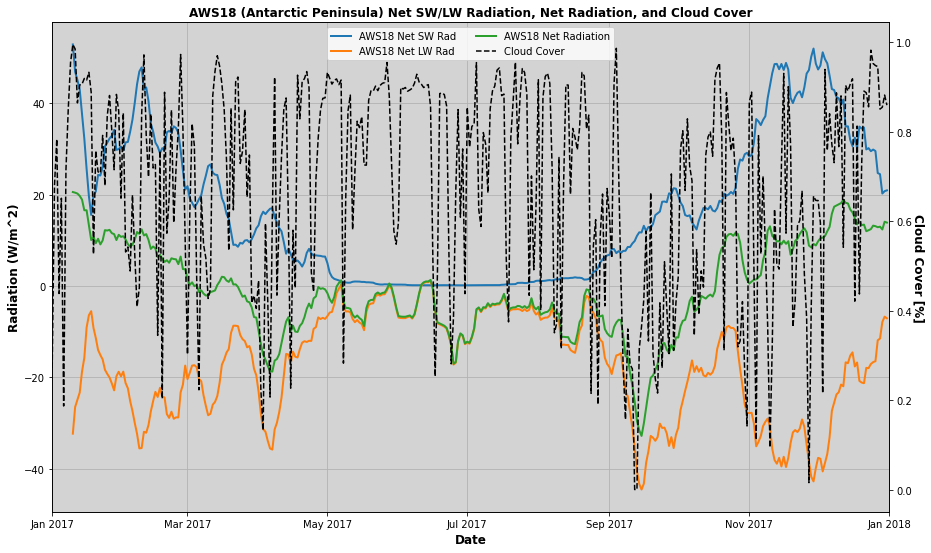

In [79]:
# Plot 10-day smoothed net shortwave/longwave radiation,
# total net radiation, and cloud cover (separate axis) for AWS18

fontsize=12

# Create variables for AWS18 Net Radiation (smoothed)
# and AWS18 Cloud Cover
aws18NetRadSmoothed = aws18NetRad.rolling(10).mean()
aws18CldCov = aws18data_subset['Cloud cov [%]']

# Set up figure and axis
fig, ax = plt.subplots(figsize=(15,10))

# Create plots of AWS Net SW/LW Radiation, and Net Radiation
AWS18NetSW_plot = ax.plot(date, aws18NetSW, label='AWS18 Net SW Rad', lw=2)
AWS18NetLW_plot = ax.plot(date, aws18NetLW, label='AWS18 Net LW Rad', lw=2)
AWS18NetRad_plot = ax.plot(date, aws18NetRadSmoothed, label='AWS18 Net Radiation', lw=2)

ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Radiation (W/m^2)', size=fontsize, weight='bold')


# Create a secondary y-axis for Cloud Cover
ax2 = ax.twinx()

# Create a plot of AWS18 cloud cover
AWS18CldCov_plot = ax2.plot(date, aws18CldCov, color='black', 
                            linestyle='--', label='Cloud Cover')
ax2.set_ylabel('Cloud Cover [%]', rotation=270, labelpad=12,
               size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2017, 1, 1), datetime.date(2018, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

plots = AWS18NetSW_plot+AWS18NetLW_plot+AWS18NetRad_plot+AWS18CldCov_plot
labels = [l.get_label() for l in plots]
ax.legend(plots, labels, loc='upper center', ncol=2)

ax.grid()
plt.title('AWS18 (Antarctic Peninsula) Net SW/LW Radiation,'+
          ' Net Radiation, and Cloud Cover', size=fontsize, weight='bold')

plt.savefig('figures/aws18_rad_cldcvr.png', facecolor='white', dpi=300)
plt.show()

# Melting

In [101]:
# Looking at AWS18 Melting from January 2015 through December 2018
# Surface Melt Flux
aws18data_subset = aws18data.loc['2015-01-01':'2018-12-31']
date = np.array(aws18data_subset.index.values)

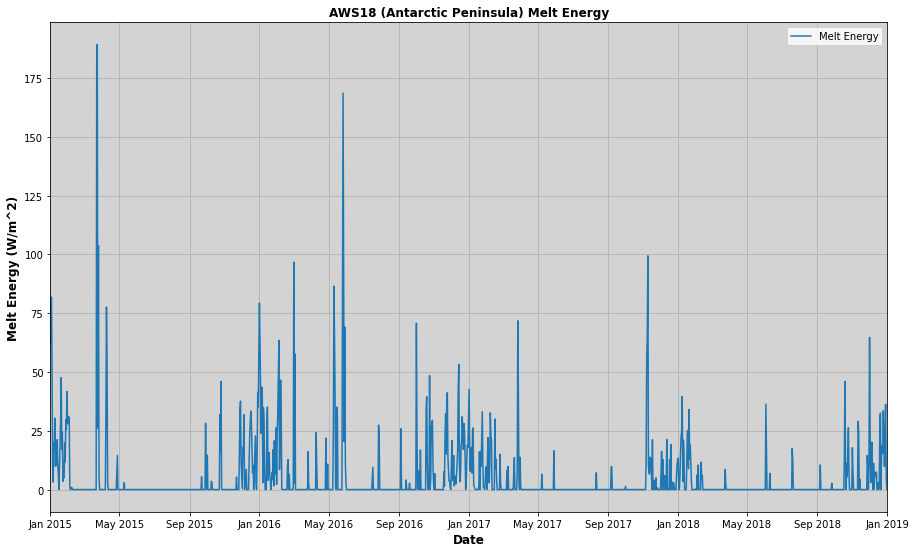

In [102]:
# Plot Surface Melt Flux (Melt Energy) for AWS18

fontsize=12

aws18MeltEnergy = aws18data_subset['Melt energy [W/m**2]']
date = np.array(aws18data_subset.index.values)

# Set up figure and axis
fig, ax = plt.subplots(figsize=(15,10))

# Plot AWS18 Melt Energy
ax.plot(date, aws18MeltEnergy, label='Melt Energy')

ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Melt Energy (W/m^2)', size=fontsize, weight='bold')

# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2019, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')

ax.grid()
plt.legend(loc='best')
plt.title('AWS18 (Antarctic Peninsula) Melt Energy', size=fontsize, weight='bold')

plt.savefig('figures/AWS18_MeltEnergy.png', facecolor='white', dpi=300)
plt.show()

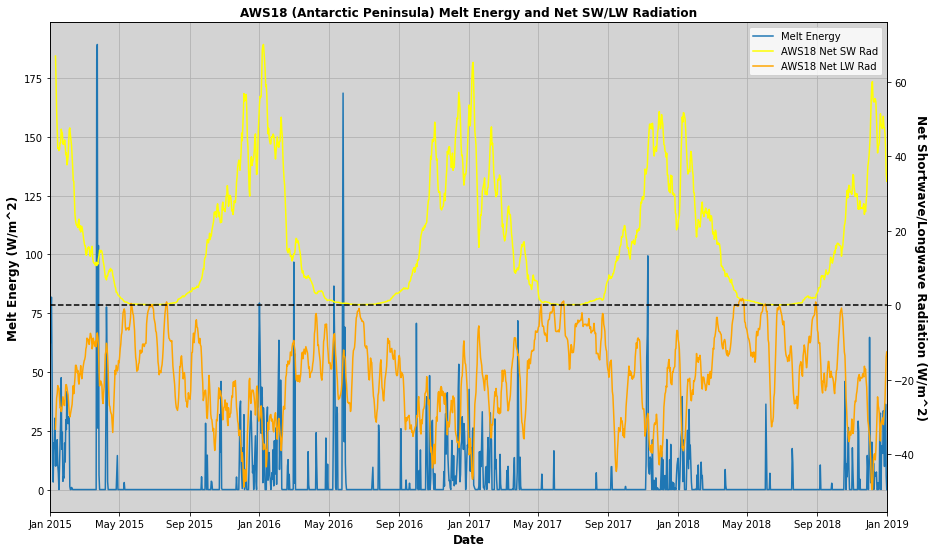

In [86]:
fontsize = 12

aws18NetSW = aws18data_subset['Net SW [W/m**2]'].rolling(10).mean()
aws18NetLW = aws18data_subset['Net LW [W/m**2]'].rolling(10).mean()

aws18MeltEnergy = aws18data_subset['Melt energy [W/m**2]']
date = np.array(aws18data_subset.index.values)

# Create figure and primary axis
fig, ax = plt.subplots(figsize=(15,10))

# Plot AWS18 Melt Energy
AWS18MeltEnergy_plot = ax.plot(date, aws18MeltEnergy, label='Melt Energy')

ax.set_facecolor('lightgray')
ax.set_xlabel('Date', size=fontsize, weight='bold')
ax.set_ylabel('Melt Energy (W/m^2)', size=fontsize, weight='bold')

# Create a secondary y-axis for AWS18 Net SW and Net LW Radiation
ax2 = ax.twinx()

AWS18NetSW_plot = ax2.plot(date, aws18NetSW, color='yellow', label='AWS18 Net SW Rad')
AWS18NetLW_plot = ax2.plot(date, aws18NetLW, color='orange', label='AWS18 Net LW Rad')
ax2.axhline(y=0, color='black', linestyle='--')


ax2.set_ylabel('Net Shortwave/Longwave Radiation (W/m^2)', rotation=270, labelpad=12,
               size=fontsize, weight='bold')


# Set x-axis limits to assignment date requirements
ax.set_xlim([datetime.date(2015, 1, 1), datetime.date(2019, 1, 1)])

# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate(rotation=0, ha='center')



plots = AWS18MeltEnergy_plot+AWS18NetSW_plot+AWS18NetLW_plot
labels = [l.get_label() for l in plots]
ax.legend(plots, labels, loc='best')

ax.grid()
plt.title('AWS18 (Antarctic Peninsula) Melt Energy and Net SW/LW Radiation',
          size=fontsize, weight='bold')

plt.savefig('figures/aws18_meltenergy_swlwrad.png', facecolor='white', dpi=300)
plt.show()